<a href="https://colab.research.google.com/github/yadavpunam/Human_Act_Recog_DNN/blob/main/Human_Act_Recog_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Deep Neural Network Model for Human Activity Recognition***
 (Supervised Learning)

**Problem Statement**

Preface: Smartphones have become an integral part of our lives. We carry them along with us everywhere. Most smartphones these days come inbuilt with several sophisticated sensors such as accelerometer, gyroscope, etc. We can use these sensors in order to track Human Activity.

In this problem statement, we have a data collection of such activity recorded by a Samsung Galaxy S-II smartphone and we will be exploiting this data for the basic implementation of a neural network which will be classifying the human activities into 6 categories.

**Dataset Description:**

It is a 563 feature dataset with 7352 instances.

*Triaxial acceleration* from the accelerometer (total acceleration) and the estimated body acceleration.

*Triaxial Angular velocity* from the gyroscope.

*Activity* is the target label.

In [ ]:
import tensorflow as tf
import tensorflow
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns

## Different libraries for model building steps
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential #To define the model architecture
from tensorflow.keras.layers import Dense, Input #To define the layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

In [ ]:
# Load the drive and read the data
from google.colab import drive
drive.mount ('/content/drive')
db = pd.read_csv('/content/drive/MyDrive/ML_data/human_activity.csv')

Mounted at /content/drive


In [ ]:
# View the data
db.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [ ]:
# Check the info
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [ ]:
# Checking for null values
db.isnull().sum()

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
tBodyAcc-std()-Z                        0
tBodyAcc-mad()-X                        0
tBodyAcc-mad()-Y                        0
tBodyAcc-mad()-Z                        0
tBodyAcc-max()-X                        0
tBodyAcc-max()-Y                        0
tBodyAcc-max()-Z                        0
tBodyAcc-min()-X                        0
tBodyAcc-min()-Y                        0
tBodyAcc-min()-Z                        0
tBodyAcc-sma()                          0
tBodyAcc-energy()-X                     0
tBodyAcc-energy()-Y                     0
tBodyAcc-energy()-Z                     0
tBodyAcc-iqr()-X                        0
tBodyAcc-iqr()-Y                        0
tBodyAcc-iqr()-Z                        0
tBodyAcc-entropy()-X                    0
tBodyAcc-entropy()-Y              

No missing values.

In [ ]:
# To get the shape of the data
db.shape

(7352, 563)

In [ ]:
# Drop the redundant column
db.drop(['subject'], axis= 1, inplace = True)  # We dropped 'subject' because it does not contribute to analysis.

In [ ]:
# Verify the removal of column by checking the shape again
db.shape

(7352, 562)

In [ ]:
# Segregate the independent and the target variable
X = db.drop('Activity', axis=1)
Y = db['Activity']   # 'Activity' is the target column

In [ ]:
print(X.shape)
print(Y.shape)

(7352, 561)
(7352,)


In [ ]:
# Number of unique values of Y
Y.nunique()

6

In [ ]:
# List the unique values of the label column
Label_keys = Y.unique().tolist()
print(Label_keys)

['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


In [ ]:
Y.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

<Axes: xlabel='Activity', ylabel='Count'>

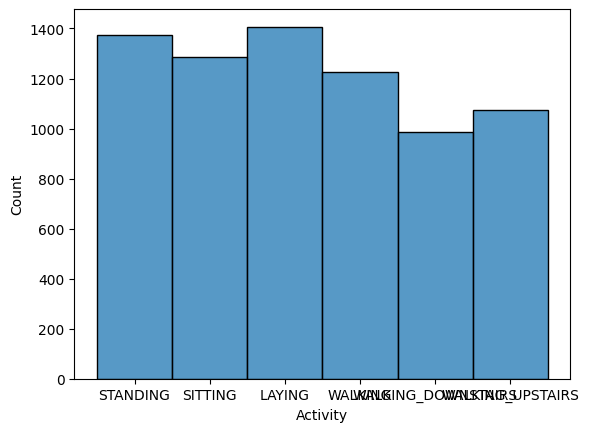

In [ ]:
sns.histplot(Y)

<Axes: >

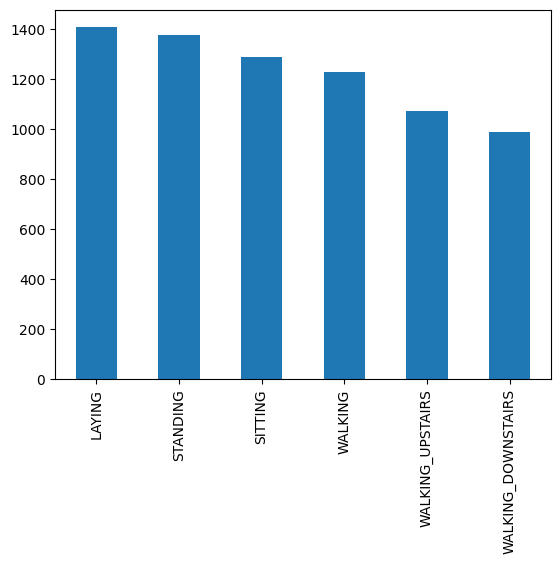

In [ ]:
pd.value_counts(Y).plot(kind='bar')

In [ ]:
# Encode the categorical features into numeric for processing

# Instantiate LabelEncoder
le = LabelEncoder()
Y_class = le.fit_transform(Y)
print(Y_class[45:190:14])
print(Y[45:190:14])

[1 0 0 3 3 3 4 4 5 5 2]
45                SITTING
59                 LAYING
73                 LAYING
87                WALKING
101               WALKING
115               WALKING
129    WALKING_DOWNSTAIRS
143    WALKING_DOWNSTAIRS
157      WALKING_UPSTAIRS
171      WALKING_UPSTAIRS
185              STANDING
Name: Activity, dtype: object


In [ ]:
# Let us split the data into train and test samples using sklearn train_test_split method
X_train, X_test, Y_train, Y_test = train_test_split(X,Y_class, test_size = 0.15, random_state = 42 )

# Let us further divide the training data into a the train2 data and validation data
X_train2, X_val, Y_train2, Y_val = train_test_split(X_train, Y_train, test_size = 0.15, random_state = 42)

In [ ]:
# Let us normalize the dataset

# Instantiate the StandardScaler
ss = StandardScaler()

# Fit and transform X_train2. Then utilize this fit information to transform the X_test and X_val data.
X_train2_scaled = ss.fit_transform(X_train2)

X_test_scaled = ss.transform(X_test)
X_val_scaled = ss.transform(X_val)

**Encoding Target variable**

In order to use categorical cross entropy as the loss function, we need to encode the target variables.

In [ ]:
# Keras.util to_categorical() function takes integers as input (no strings allowed) and converts it into a binary class matrix

Y_train2 = to_categorical(Y_train2)
Y_test = to_categorical(Y_test)
Y_val = to_categorical(Y_val)

In [ ]:
X_train2.shape

(5311, 561)

**Model Building**

After pre-processing of the data, now let's build a predictive model using Neural Network.

In [ ]:
model = Sequential([Input(shape = (561,)),      # Input layer # Note: there are 561 input features
                    Dense(128, activation= 'relu'),  # Hidden layer-1
                    Dense(36, activation ='relu'),
                    Dense(16, activation = 'relu'),
                    Dense(6, activation = 'softmax')])    # Output layer # Note: There are 6 output labels in the target column

In [ ]:
# Check model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 128)               71936     
                                                                 
 dense_33 (Dense)            (None, 36)                4644      
                                                                 
 dense_34 (Dense)            (None, 16)                592       
                                                                 
 dense_35 (Dense)            (None, 6)                 102       
                                                                 
Total params: 77274 (301.85 KB)
Trainable params: 77274 (301.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Model compilation using suitable loss, optimizer and metrics
model.compile(loss= 'categorical_crossentropy', optimizer = Adam(learning_rate=0.001), metrics = ['accuracy'])

In [ ]:
X_val_scaled.shape

(938, 561)

In [ ]:
# Train the model over X_train2_scaled and Y_train2 and validation data
train = model.fit(X_train2_scaled, Y_train2, validation_data= (X_val_scaled, Y_val), epochs=50)

Epoch 1/50
166/166 [==============================] - 2s 4ms/step - loss: 0.3318 - accuracy: 0.8816 - val_loss: 0.1376 - val_accuracy: 0.9563
Epoch 2/50
166/166 [==============================] - 1s 3ms/step - loss: 0.1061 - accuracy: 0.9627 - val_loss: 0.0643 - val_accuracy: 0.9787
Epoch 3/50
166/166 [==============================] - 1s 4ms/step - loss: 0.0798 - accuracy: 0.9706 - val_loss: 0.0790 - val_accuracy: 0.9701
Epoch 4/50
166/166 [==============================] - 1s 5ms/step - loss: 0.0563 - accuracy: 0.9802 - val_loss: 0.0476 - val_accuracy: 0.9829
Epoch 5/50
166/166 [==============================] - 1s 6ms/step - loss: 0.0525 - accuracy: 0.9814 - val_loss: 0.0421 - val_accuracy: 0.9861
Epoch 6/50
166/166 [==============================] - 1s 7ms/step - loss: 0.0472 - accuracy: 0.9819 - val_loss: 0.0597 - val_accuracy: 0.9723
Epoch 7/50
166/166 [==============================] - 1s 6ms/step - loss: 0.0485 - accuracy: 0.9797 - val_loss: 0.0857 - val_accuracy: 0.9638
Epoch 

<Figure size 640x480 with 0 Axes>

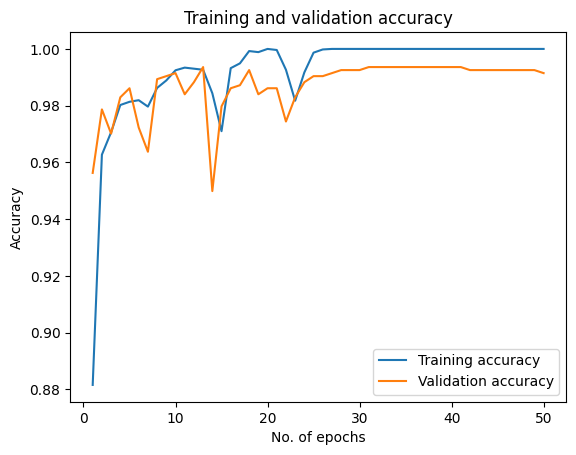

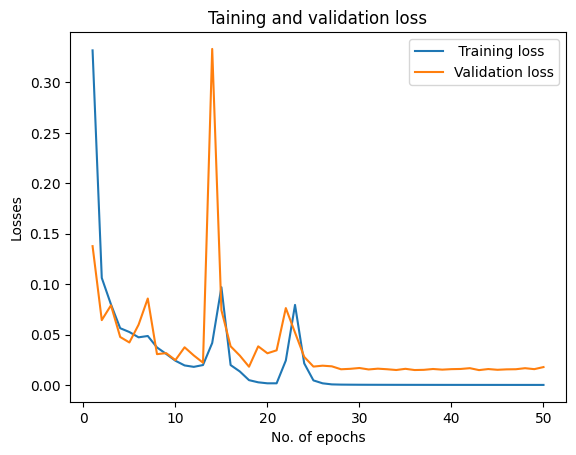

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot graphs to show change in
# 1. training loss and validation loss v/s epochs
# 2. training accuracy and validation accuracy v/s epochs

train_accuracy = train.history['accuracy']   # .history() provides with the entire history of the desired sttribute
train_loss = train.history['loss']
val_accuracy = train.history['val_accuracy']
val_loss = train.history['val_loss']

epochs = range(1,51)             # To get number of epochs

plt.plot(epochs, train_accuracy, label = 'Training accuracy')
plt.plot(epochs, val_accuracy, label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy')
plt.figure()

plt.plot(epochs, train_loss, label = ' Training loss')
plt.plot(epochs, val_loss, label ='Validation loss')
plt.title('Taining and validation loss')
plt.legend(loc = 'upper right')
plt.xlabel('No. of epochs')
plt.ylabel('Losses')
plt.figure()

In [ ]:
# Make predictions on test data
y_pred = model.predict(X_test_scaled)

35/35 [==============================] - 0s 2ms/step


In [ ]:
# Evaluate the model using Keras.evaluate()
# model.evaluate(x_test, y_test) returns a tuple of two values i.e. the loss of the model on test data and the accuracy of the model on test data.
scores = model.evaluate(X_test_scaled, Y_test, verbose = 0)
print('Loss: ', scores[0])
print('Accuracy: ', scores[1])

Loss:  0.03870455175638199
Accuracy:  0.9900271892547607


In [ ]:
# Print the confusion matrix

cm = metrics.confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)

[[194   0   0   0   0   0]
 [  0 200   3   0   0   0]
 [  0   5 209   0   0   0]
 [  0   0   0 190   0   0]
 [  0   0   0   0 156   0]
 [  0   0   0   1   2 143]]


**Conclusion:**

We were able to build a classifier model with one input layer, 2 hidden dense layers (relu activation func.) and one output layer (softmax func.). Changing the number of neurons in the Dense layers gave us different values of losses and accuracy. The best values of test accuracy achieved is 99% and the test loss is as low as 3.8%.

Furthermore, we can increase the number of dense layers in order to increase the accuracy but that will also make the model more complex.

**Happy to learn:)**